In [1]:
import pandas as pd
import numpy as np
import graph_tool.all as gt
import random

In [2]:
#generate random coordinates
points = np.random.random((1000, 2))

In [3]:
#generate a geometric graph from the points
G, pos = gt.geometric_graph(points, 0.1)

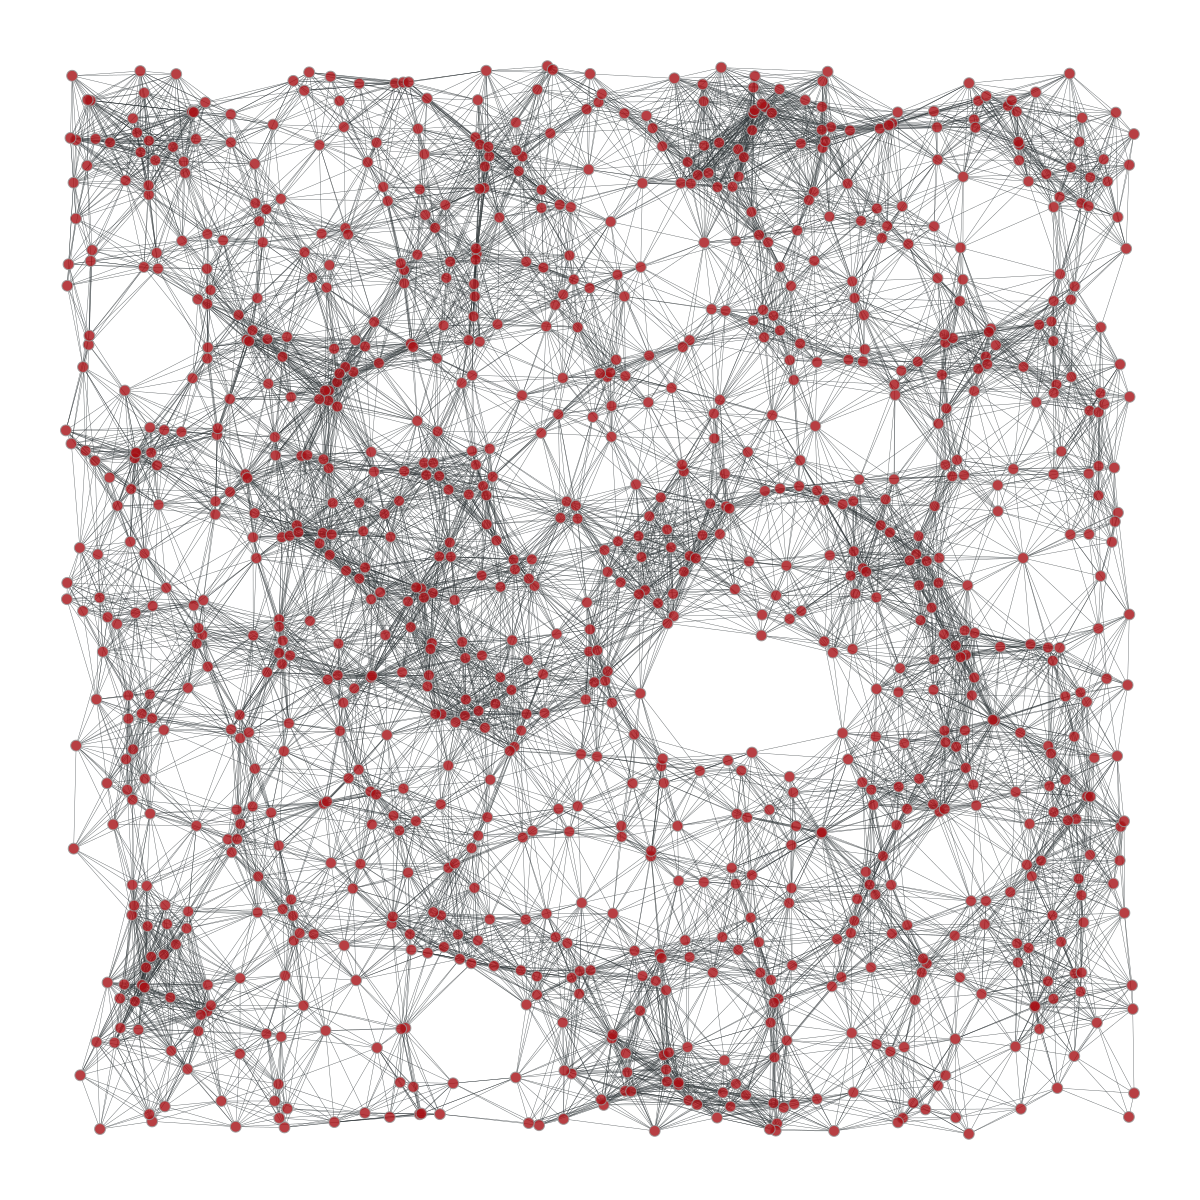

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f5f7b6da0d0, at 0x7f5f7b6dad10>

In [4]:
gt.graph_draw(G, pos=pos, edge_pen_width=0.2)

### cluster with gaussian mixture model

In [5]:
from gaussian_mixture_model import GMM 

In [6]:
cdf = GMM(G, k_min=20, k_max=60) #G should be gt object

Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [01:10<00:00,  7.02s/it]


tuning the number of clusters ...


100%|██████████| 40/40 [01:46<00:00,  2.67s/it]


In [7]:
node_color = dict(zip(cdf.node, cdf.color))
vc = G.new_vp('string')
for v in G.iter_vertices(): vc[v] = node_color[v]

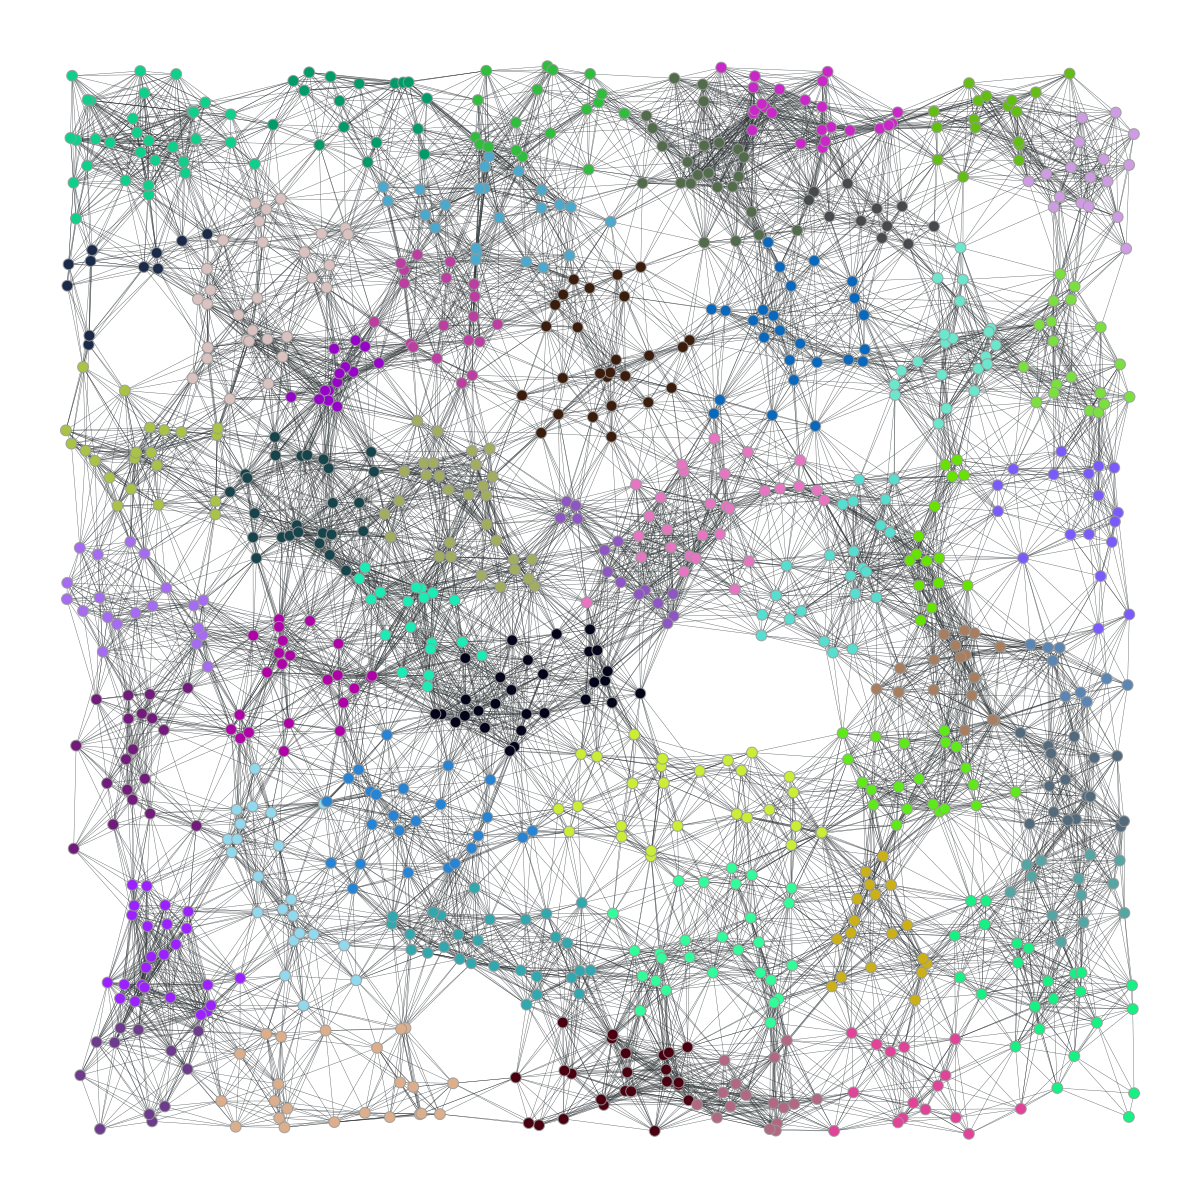

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f5f7b6da0d0, at 0x7f5f5dcbfc50>

In [12]:
gt.graph_draw(G, pos=pos, edge_pen_width=0.2, vertex_fill_color=vc)#,
             #output='gmm_on_geometric_networks.svg')

In [10]:
cdf.groupby('cluster')['node'].size().min(), cdf.groupby('cluster')['node'].size().max()

(9, 31)